In [2]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
from keras.models import Sequential
from keras.layers import Flatten, LSTM, Dense, TimeDistributed, BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using TensorFlow backend.


In [3]:

def readImage(dirname, resize_size=(300,300), noOfImage=-1):
  timeaccord= []
  for fname in os.listdir(dirname):
    timeaccord.append(fname)
  timeaccord.sort()
  print(timeaccord)
  print(len(timeaccord))
  
  if noOfImage == -1:
    noOfImage = len(timeaccord)

  images = []
  for fname in timeaccord[:noOfImage]:
      # img = cv.imread(dirname+fname,0)
      # #print(img)
      # img = cv.resize(img,resize_size,interpolation=cv.INTER_AREA)
      img = Image.open(os.path.join(dirname, fname))
      img = img.resize(resize_size)
      images.append(np.array(img))
      #drawImage(img, fname)
  return np.array(images)

def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
 
	return err

def drawImage(img, title = "image"):
  imarray = np.array(img)
  plt.title(title+str(imarray.shape))
  plt.imshow(img)
  plt.show()

In [4]:
def ConvLSTM(sequence_size=5, image_size=(300, 300), no_of_convo_layer=3, no_of_lstm_layer=2):
  model = Sequential()
  model.add(BatchNormalization(input_shape=(sequence_size,image_size[0],image_size[1],1)))

  for i in range(no_of_convo_layer):
    model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
    model.add(TimeDistributed(Dropout(0.4)))

  model.add(TimeDistributed(Flatten()))
  for i in range(no_of_lstm_layer-1):
    model.add(LSTM(units=1024, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
  model.add(LSTM(units=1024, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
  model.add(Dense(image_size[0]*image_size[1], activation='softplus'))

  model.compile(loss='mean_squared_error', optimizer='nadam')
  #model.summary()
  return model

In [5]:
def train_model(images, image_size=(300,300), train_sequence_size=5):
  # image_size = (300, 300)
  # train_sequence_size =5
  starting_train_sequence_index=0
  validate_sequence_size=train_sequence_size
  starting_validate_sequence_index=starting_train_sequence_index + train_sequence_size
  
  model = ConvLSTM(train_sequence_size, image_size)
  model.fit(images[starting_train_sequence_index:starting_train_sequence_index+train_sequence_size].reshape(1,train_sequence_size,image_size[0],image_size[1],1), images[starting_train_sequence_index+train_sequence_size].reshape(1,image_size[0]*image_size[1]),
          validation_data = (images[starting_validate_sequence_index:starting_validate_sequence_index+validate_sequence_size].reshape(1,validate_sequence_size,image_size[0],image_size[1],1), images[starting_validate_sequence_index+validate_sequence_size].reshape(1,image_size[0]*image_size[1])),
          batch_size=4, epochs=150) 
  return model

In [6]:
# dirname = '/content/drive/My Drive/ISRO_SIH_20/INSAT3D_TRI_India_JPEG/'
dirname = '/content/drive/My Drive/ISRO_SIH_20/INSAT3D_TIR1_India/INSAT3D_TIR1_India'
image_size = (500,500)
images = readImage(dirname, image_size)
model = train_model(images, image_size)
model.save('conv_lstm_best.h5')

['3DIMG_07NOV2019_0000_L1C_SGP.tif', '3DIMG_07NOV2019_0030_L1C_SGP.tif', '3DIMG_07NOV2019_0100_L1C_SGP.tif', '3DIMG_07NOV2019_0130_L1C_SGP.tif', '3DIMG_07NOV2019_0200_L1C_SGP.tif', '3DIMG_07NOV2019_0230_L1C_SGP.tif', '3DIMG_07NOV2019_0300_L1C_SGP.tif', '3DIMG_07NOV2019_0330_L1C_SGP.tif', '3DIMG_07NOV2019_0400_L1C_SGP.tif', '3DIMG_07NOV2019_0430_L1C_SGP.tif', '3DIMG_07NOV2019_0500_L1C_SGP.tif', '3DIMG_07NOV2019_0530_L1C_SGP.tif', '3DIMG_07NOV2019_0600_L1C_SGP.tif', '3DIMG_07NOV2019_0630_L1C_SGP.tif', '3DIMG_07NOV2019_0700_L1C_SGP.tif', '3DIMG_07NOV2019_0730_L1C_SGP.tif', '3DIMG_07NOV2019_0800_L1C_SGP.tif', '3DIMG_07NOV2019_0830_L1C_SGP.tif', '3DIMG_07NOV2019_0859_L1C_SGP.tif', '3DIMG_07NOV2019_0900_L1C_SGP.tif', '3DIMG_07NOV2019_0929_L1C_SGP.tif', '3DIMG_07NOV2019_0930_L1C_SGP.tif', '3DIMG_07NOV2019_0959_L1C_SGP.tif', '3DIMG_07NOV2019_1000_L1C_SGP.tif', '3DIMG_07NOV2019_1030_L1C_SGP.tif', '3DIMG_07NOV2019_1100_L1C_SGP.tif', '3DIMG_07NOV2019_1130_L1C_SGP.tif', '3DIMG_07NOV2019_1200_L1C_S

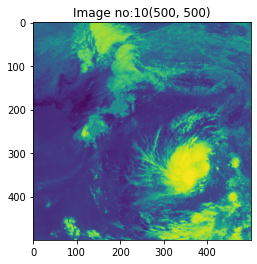

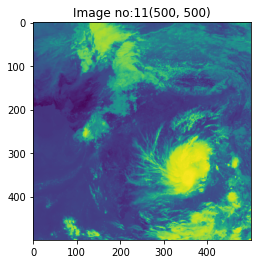

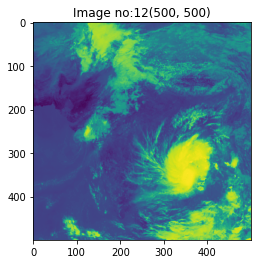

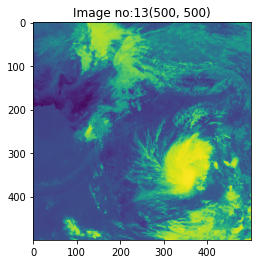

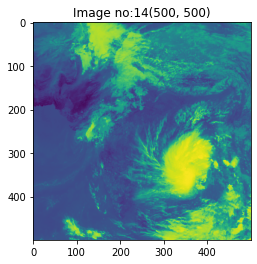

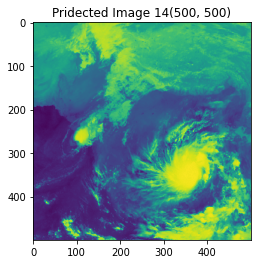

MSE:  177826.7993175498


array([[224.85397, 224.83257, 224.96234, ..., 225.84642, 225.77956,
        225.83676],
       [224.91309, 224.92165, 224.95932, ..., 225.49208, 225.47221,
        225.4142 ],
       [224.88205, 224.86055, 225.02936, ..., 225.46547, 225.32867,
        225.31076],
       ...,
       [218.59752, 218.59546, 218.52893, ..., 226.52528, 226.67674,
        226.47496],
       [218.65733, 218.69997, 218.8004 , ..., 226.26132, 226.53764,
        226.19553],
       [218.88048, 218.68501, 218.74588, ..., 226.26633, 226.50174,
        226.0389 ]], dtype=float32)

In [8]:
def predict_nxt_frame(model,  images, image_size, start=10, sequence_size=5):
  output = model.predict(images[start:start+sequence_size].reshape(1,sequence_size,image_size[0],image_size[1],1))
  output = output.reshape(1,image_size[0],image_size[1])
  # print(type(output))
  output = output[0,:,:].reshape(image_size[0],image_size[1])
  for i in range(start,start+sequence_size):
    # print(i)
    drawImage(images[i], f'Image no:{i}')
  
  drawImage(images[i+1], f'Image no:{i+1}')
  drawImage(output, f'Pridected Image {i+1}')
  print('MSE: ',mse(images[start+sequence_size], output))
  return output

predict_nxt_frame(model, images, image_size)